In [1]:
# Importing all the required Libraries
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix

In [2]:
# Loading and Displaying the Dataset
data_frame = pd.read_csv('C:/Users/shrey/Downloads/Sleep_health_and_lifestyle_dataset.csv')
data_frame

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Data Understanding and Correction

In [3]:
for column in data_frame.columns:
    if column != 'Person ID':
        unique_values = data_frame[column].unique()
        print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Age': [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Unique values in 'Occupation': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in 'Sleep Duration': [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Unique values in 'Quality of Sleep': [6 4 7 5 8 9]
Unique values in 'Physical Activity Level': [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Unique values in 'Stress Level': [6 8 7 4 3 5]
Unique values in 'BMI Category': ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique values in 'Blood Pressure': ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95

##### Issues with Data
From the unique values or data presented above, I have identified an issue.

Split the 'Blood Pressure' column into two columns

### Data Cleaning


In [4]:
print(data_frame.shape)
print(data_frame.info())

(374, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In [5]:
missing_percentage = round(data_frame.isnull().sum() / len(data_frame.index) * 100, 2)
print("Percentage of missing values in each column of Combined_sleep_data:")
print(missing_percentage)

Percentage of missing values in each column of Combined_sleep_data:
Person ID                  0.0
Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64


In [6]:
# Assumed  None is considered as  is no disorder, otherwise categorized as Insomnia or Sleep Apnea.

data_frame['Sleep Disorder'].replace('None', 'No disorder', inplace=True)

data_frame

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:
data_frame[['Systolic BP', 'Diastolic BP']] = data_frame['Blood Pressure'].str.split('/', expand=True)   
data_frame[['Systolic BP', 'Diastolic BP']] = data_frame[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric)
data_frame = data_frame.drop('Blood Pressure', axis=1)
data_frame.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


### Data Preparation and exploring

In [8]:
# Dropping irrelevant columns
data_frame = data_frame.drop(columns=['Person ID'])

In [9]:
sleep_data_categorical = data_frame.select_dtypes(include=['object'])
sleep_data_numerical = data_frame.select_dtypes(include=['int64', 'float64'])

print("Categorical Data:")
print(sleep_data_categorical.head(5))

print("\nNumerical Data:")
print(sleep_data_numerical.head(5))

Categorical Data:
  Gender            Occupation BMI Category Sleep Disorder
0   Male     Software Engineer   Overweight    No disorder
1   Male                Doctor       Normal    No disorder
2   Male                Doctor       Normal    No disorder
3   Male  Sales Representative        Obese    Sleep Apnea
4   Male  Sales Representative        Obese    Sleep Apnea

Numerical Data:
   Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0   27             6.1                 6                       42   
1   28             6.2                 6                       60   
2   28             6.2                 6                       60   
3   28             5.9                 4                       30   
4   28             5.9                 4                       30   

   Stress Level  Heart Rate  Daily Steps  Systolic BP  Diastolic BP  
0             6          77         4200          126            83  
1             8          75        10000          125   

In [10]:
def plot_column(*column_data):
    fig, axs = plt.subplots(1, len(column_data), figsize=(10, 6))
    colors = sns.color_palette("colorblind")
    
    for i, column in enumerate(column_data):
        ax = axs[i] if len(column_data) > 1 else axs
        column_counts = column.value_counts()
        column_counts.plot(kind='bar', ax=ax, color=colors)
        ax.set_title(f'{column.name} Distribution')
        ax.set_xlabel(column.name)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

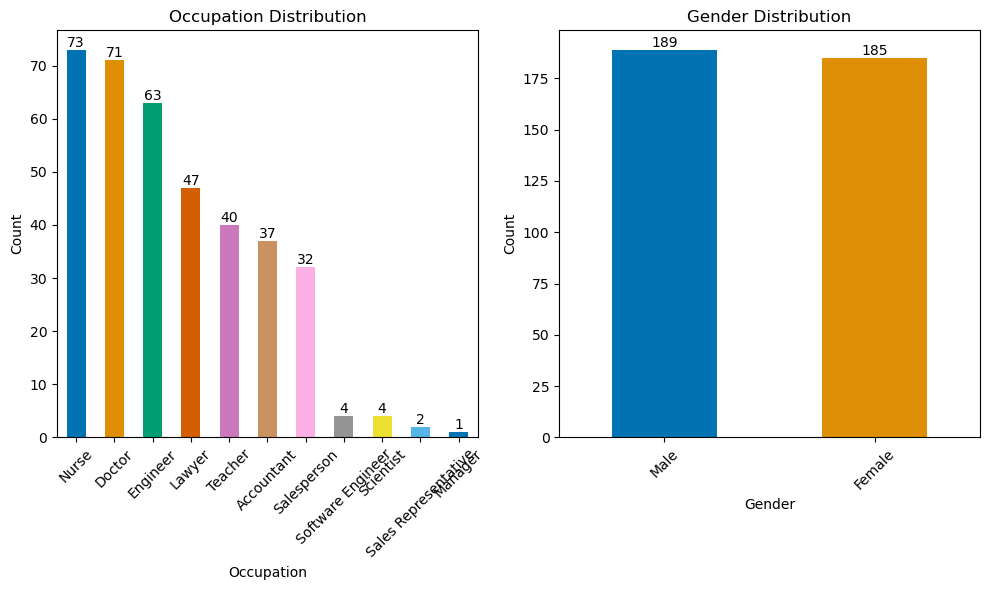

In [11]:
plot_column(sleep_data_categorical['Occupation'], sleep_data_categorical['Gender'])

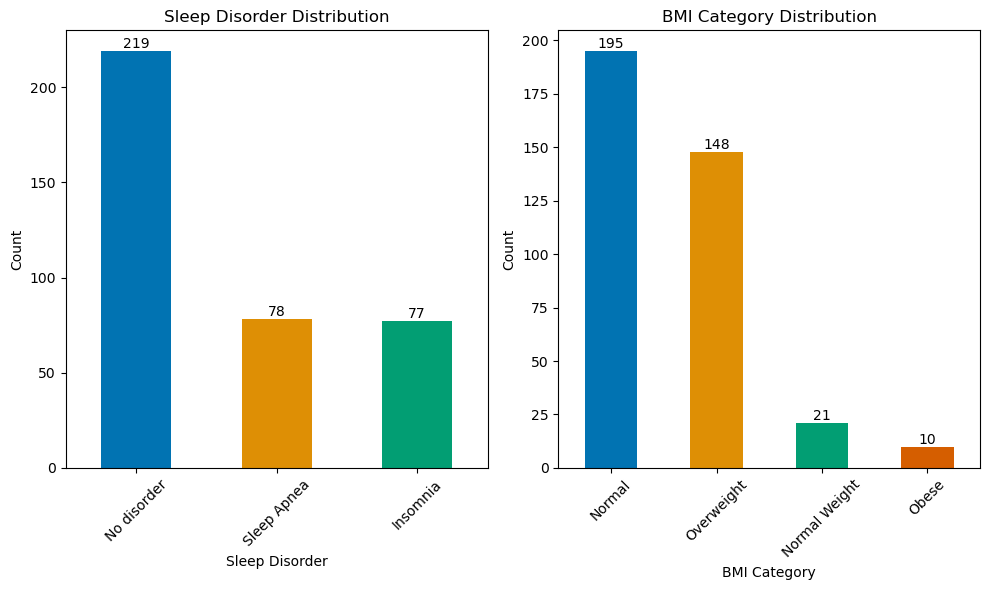

In [12]:
plot_column(sleep_data_categorical['Sleep Disorder'], sleep_data_categorical['BMI Category'])

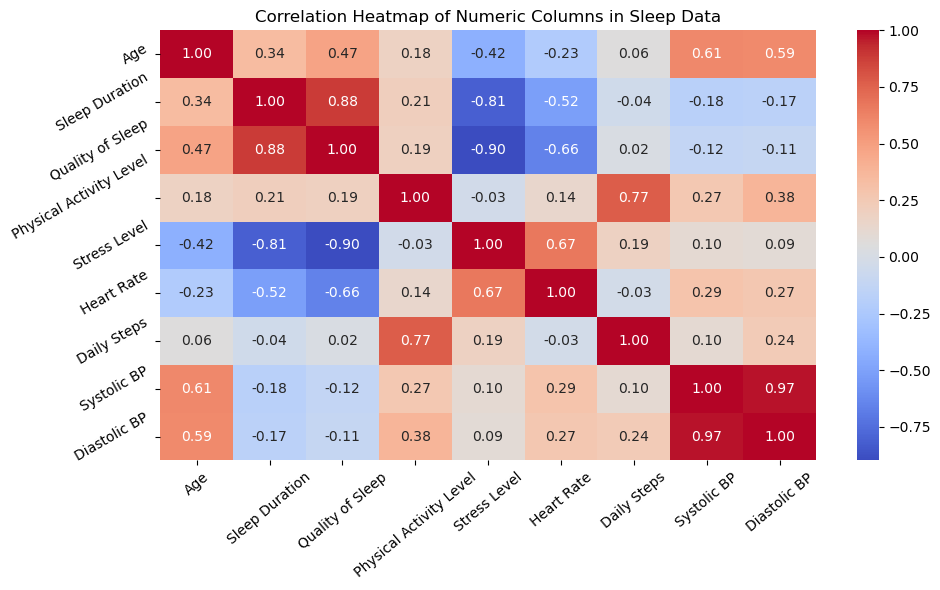

In [13]:
correlation_matrix = sleep_data_numerical.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns in Sleep Data')
plt.xticks(rotation=40)
plt.yticks(rotation=30)
plt.tight_layout()
plt.show()

#### Quality of sleep
Quality of Sleep is highly positively correlated with Sleep Duration (0.88), indicating that longer sleep duration tends to improve sleep quality.

Age is moderetely correlated with Quality of sleep (0.47) especially females

There is a strong negative correlation with Stress Level (-0.90), suggesting that higher stress levels significantly reduce sleep quality.

Quality of Sleep is negatively correlated with Heart Rate (-0.66), indicating that higher heart rates are associated with lower sleep quality.

Overall, Sleep Duration, Stress Level, Heart rate and Age are the major factor affecting quality of sleep

In [14]:
def plot_pairplot_with_trend(data, x_vars, y_var, title, palette='colorblind'):
    fig, axes = plt.subplots(1, len(x_vars), figsize=(6 * len(x_vars), 6))
    fig.suptitle(title, y=1.02, fontsize=15)
    for i, x_var in enumerate(x_vars):
        sns.regplot(
            x=x_var,
            y=y_var,
            data=data,
            ax=axes[i],
            scatter_kws={'s': 50, 'alpha': 0.5},
            line_kws={'color': 'red'}
        )
        axes[i].set_title(f'{x_var} vs {y_var}')
    plt.tight_layout()
    plt.show()

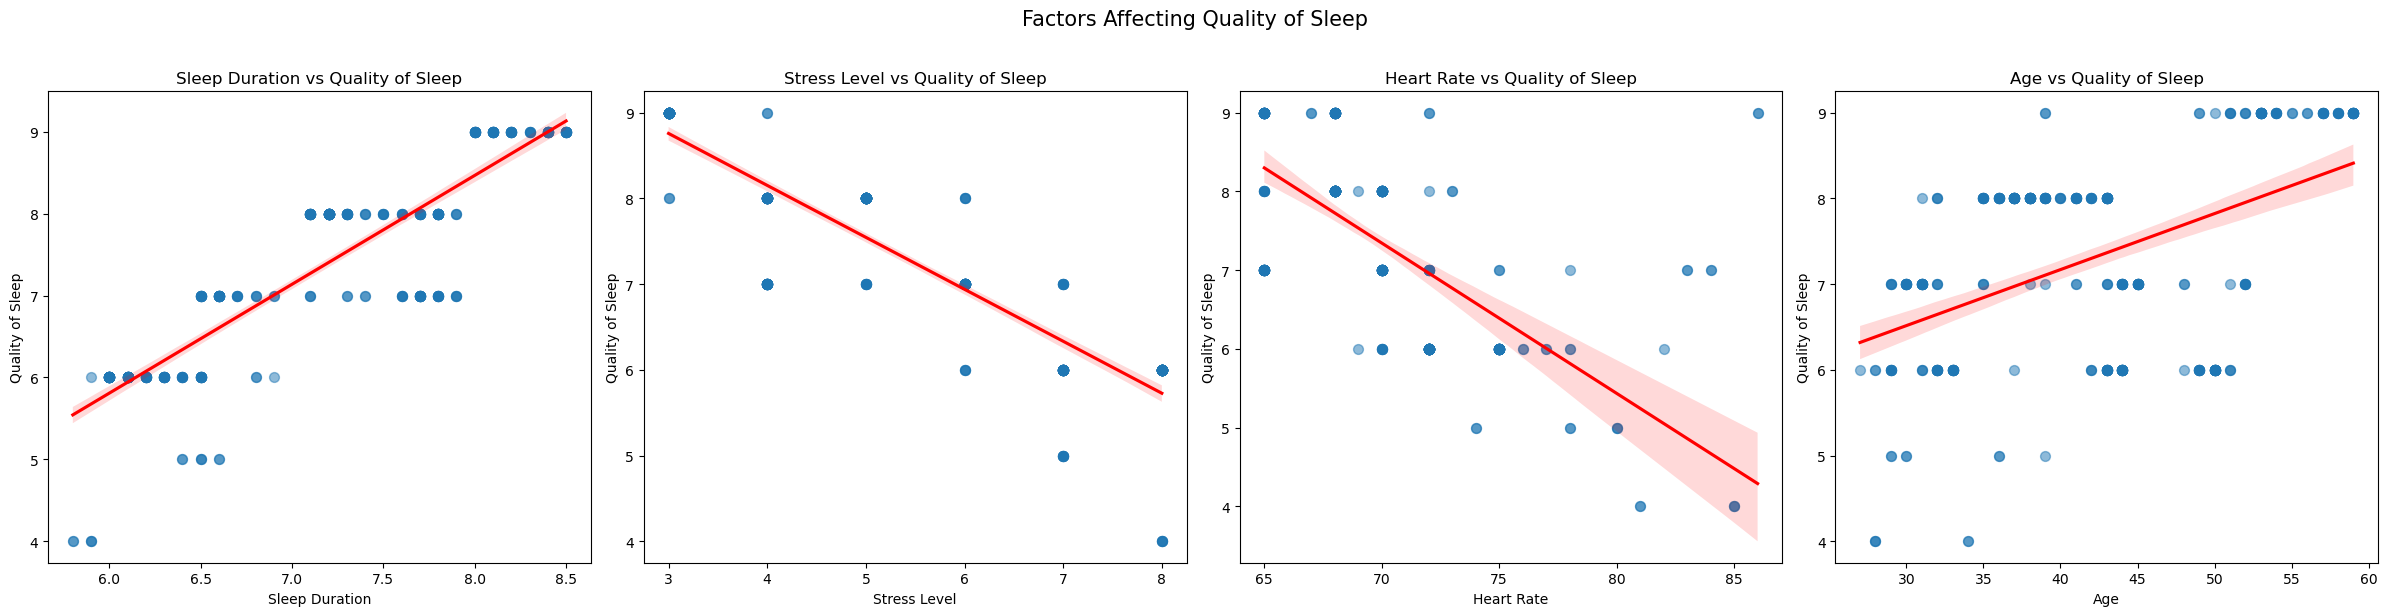

In [15]:

plot_pairplot_with_trend(data_frame, ['Sleep Duration', 'Stress Level', 'Heart Rate','Age'], 
                         'Quality of Sleep', 'Factors Affecting Quality of Sleep', palette='colorblind')

#### Sleep Duration
Sleep Duration is highly positively correlated with Quality of Sleep (0.88), indicating that longer sleep duration is associated with better sleep quality.

There is a strong negative correlation with Stress Level (-0.81), suggesting that higher stress levels significantly reduce sleep duration.

Sleep Duration is negatively correlated with Heart Rate (-0.52), indicating that higher heart rates are associated with shorter sleep duration.

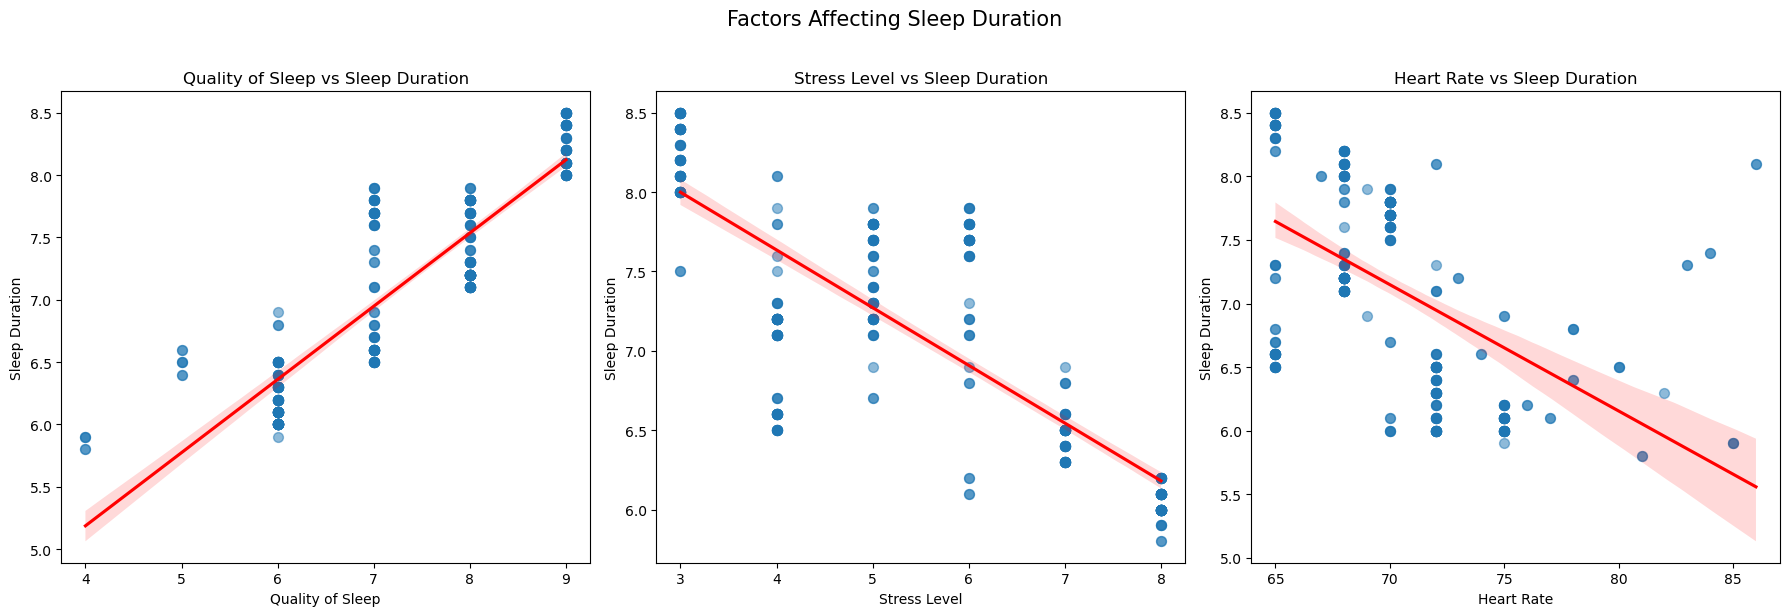

In [16]:
plot_pairplot_with_trend(data_frame, ['Quality of Sleep', 'Stress Level', 'Heart Rate'], 
                         'Sleep Duration', 'Factors Affecting Sleep Duration', palette='colorblind')

# Stress level

###### Strong Negative Correlations
Stress Level is strongly negatively correlated with Sleep Duration (-0.81), indicating that higher stress levels are associated with shorter sleep duration.

There is a strong negative correlation with Quality of Sleep (-0.90), suggesting that higher stress levels significantly reduce sleep quality. 
###### positive correlation
Stress Level is positively correlated with Heart Rate (0.67), indicating that higher stress levels are associated with higher heart rates.

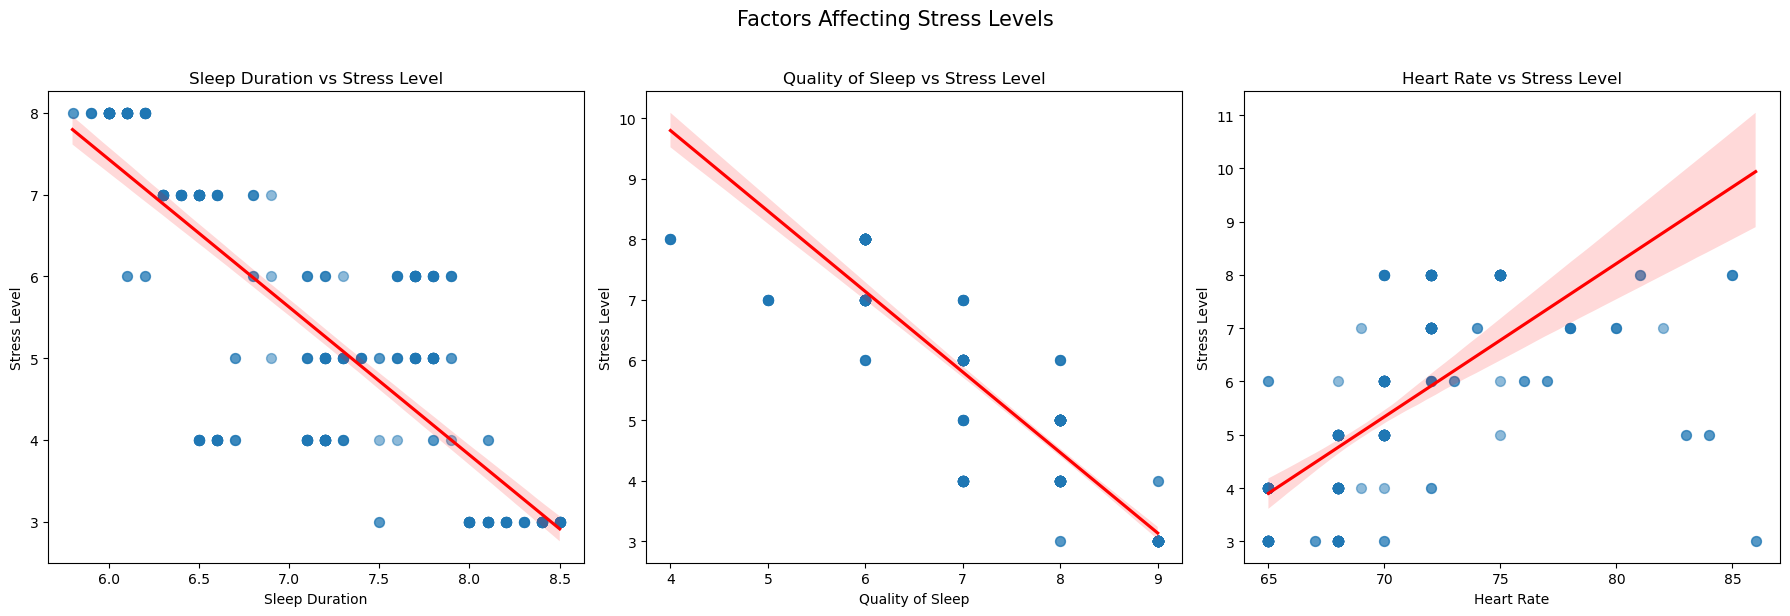

In [17]:
plot_pairplot_with_trend(data_frame, ['Sleep Duration', 'Quality of Sleep', 'Heart Rate'], 
                         'Stress Level', 'Factors Affecting Stress Levels', palette='colorblind')


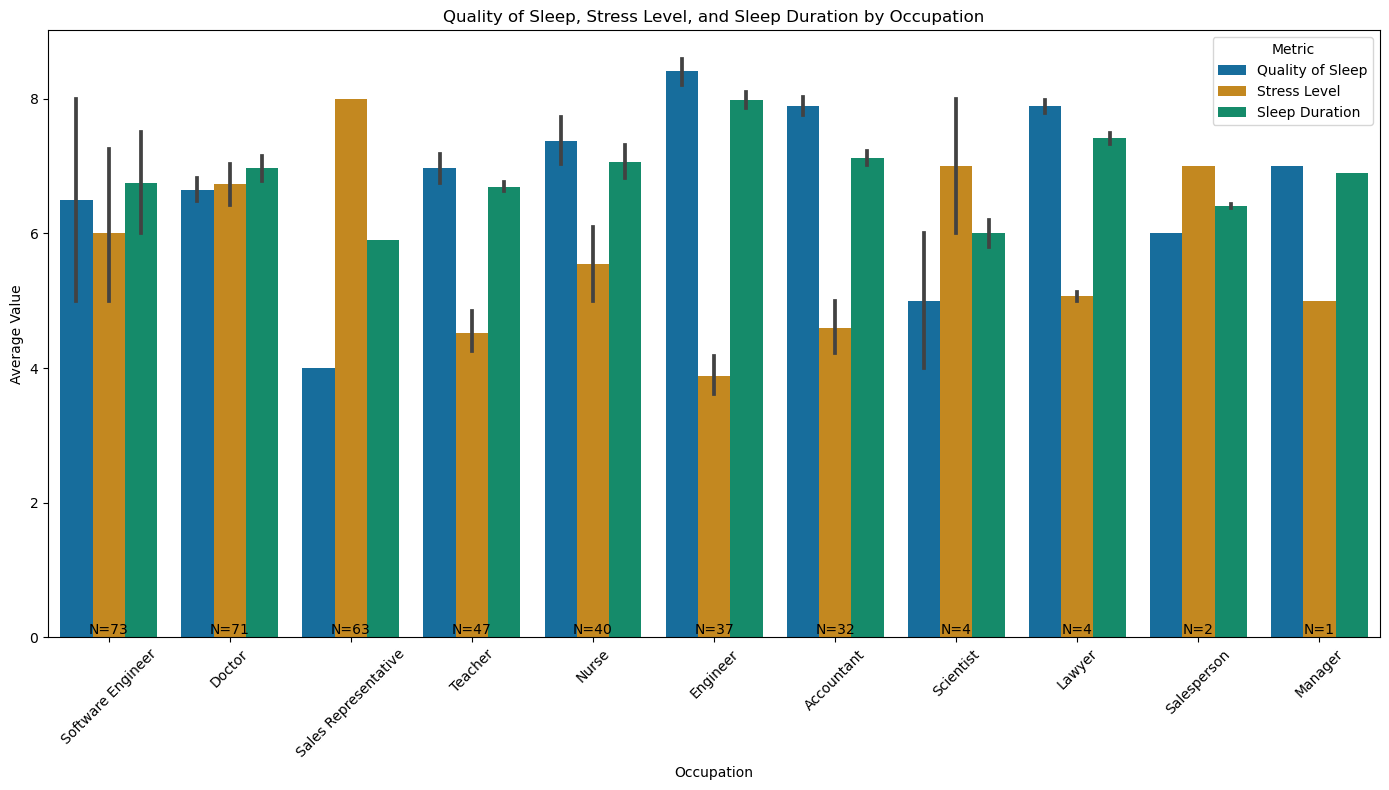

In [18]:

def plot_metrics_by_occupation(data, metrics, title):
    plot_data = data.melt(id_vars='Occupation', value_vars=metrics, 
                          var_name='Metric', value_name='Value')
    occupation_counts = data['Occupation'].value_counts().reset_index()
    occupation_counts.columns = ['Occupation', 'Count']
    plot_data = plot_data.merge(occupation_counts, on='Occupation')
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Occupation', y='Value', hue='Metric', data=plot_data, palette='colorblind')
    for index, row in occupation_counts.iterrows():
        plt.text(index, 0, f'N={row["Count"]}', ha='center', va='bottom', color='black', fontsize=10)
    plt.title(title)
    plt.xlabel('Occupation')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_metrics_by_occupation(data_frame, ['Quality of Sleep', 'Stress Level', 'Sleep Duration'], 
                           'Quality of Sleep, Stress Level, and Sleep Duration by Occupation')




Adequate sleep duration leads to reduced stress levels, which positively impacts sleep quality, especially in the case of Teachers, Engineers, Accountant

A significant gap between sleep duration and stress level is observed, which negatively impacts sleep quality, particularly affecting occupations like sales representative,scientist Addressing this gap is crucial for improving overall sleep health and reducing stress-related issues.

Balanced Occupations: Doctors and Software Engineers tend to have a relatively balanced combination of stress level and sleep quality.

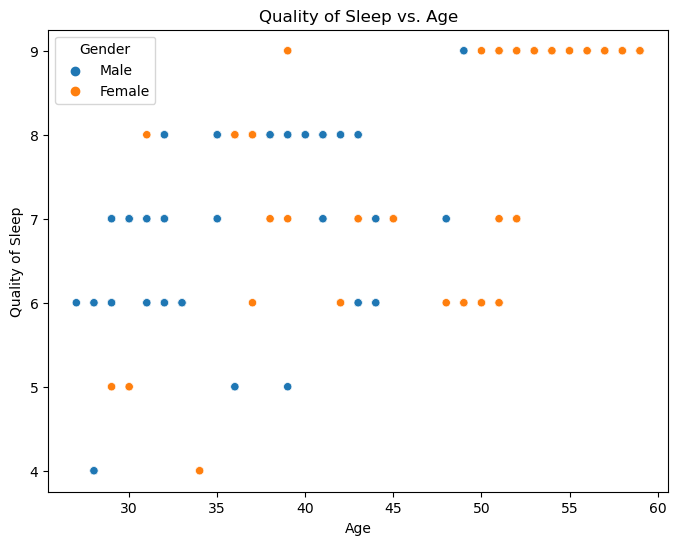

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_frame, x='Age', y='Quality of Sleep', hue='Gender')
plt.title("Quality of Sleep vs. Age")
plt.xlabel("Age")
plt.ylabel("Quality of Sleep")
plt.legend(title='Gender')
plt.show()


Middle Age Groups (40-50 years): Both males and females typically exhibit moderate to high sleep quality, with scores ranging from 6 to 9. There is a distinct concentration of sleep quality scores between 6 and 8 for both genders.

Older Age Groups (50-60 years): Sleep quality is generally high in this age range, with most scores falling between 7 and 9. Females in this group, in particular, tend to have higher sleep quality scores.

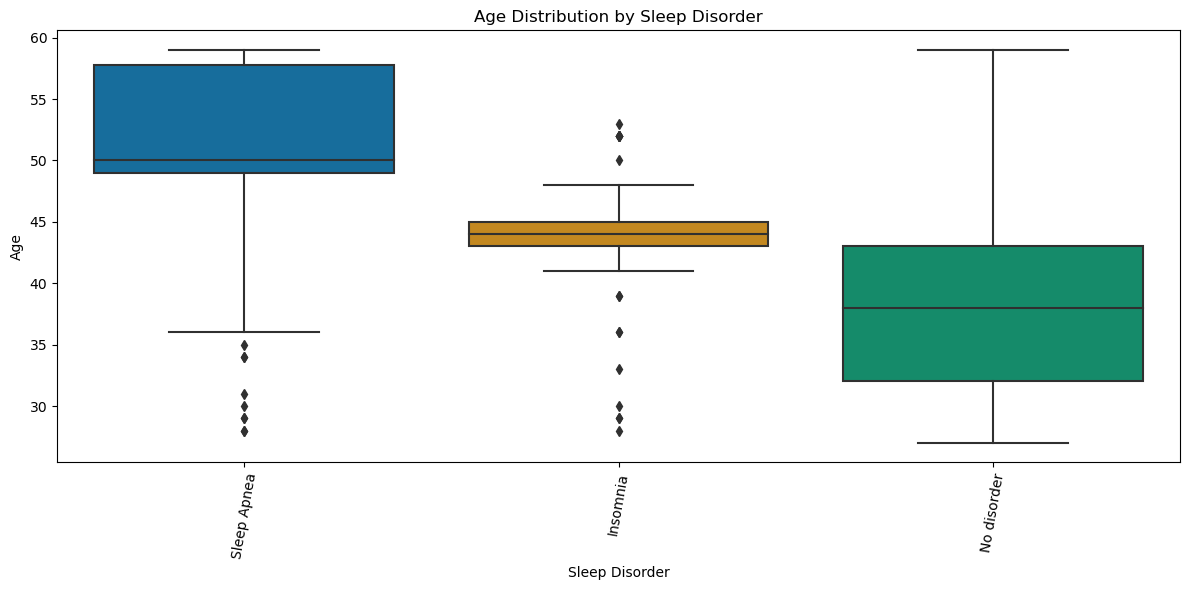

In [20]:
age_order = data_frame.groupby('Sleep Disorder')['Age'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
sns.boxplot(x="Sleep Disorder", y="Age", data=data_frame, order=age_order, palette='colorblind')
plt.xticks(rotation=80)
plt.xlabel('Sleep Disorder')
plt.ylabel('Age')
plt.title('Age Distribution by Sleep Disorder')
plt.tight_layout()
plt.show()


Sleep apnea mainly impacts individuals aged 30 to 60, with a median age of about 50, making it more prevalent in older adults. Insomnia primarily affects individuals aged 40 to 50, with a median age of around 45, indicating it is more common in the middle-aged population.

#### Numerical Data Visualisation

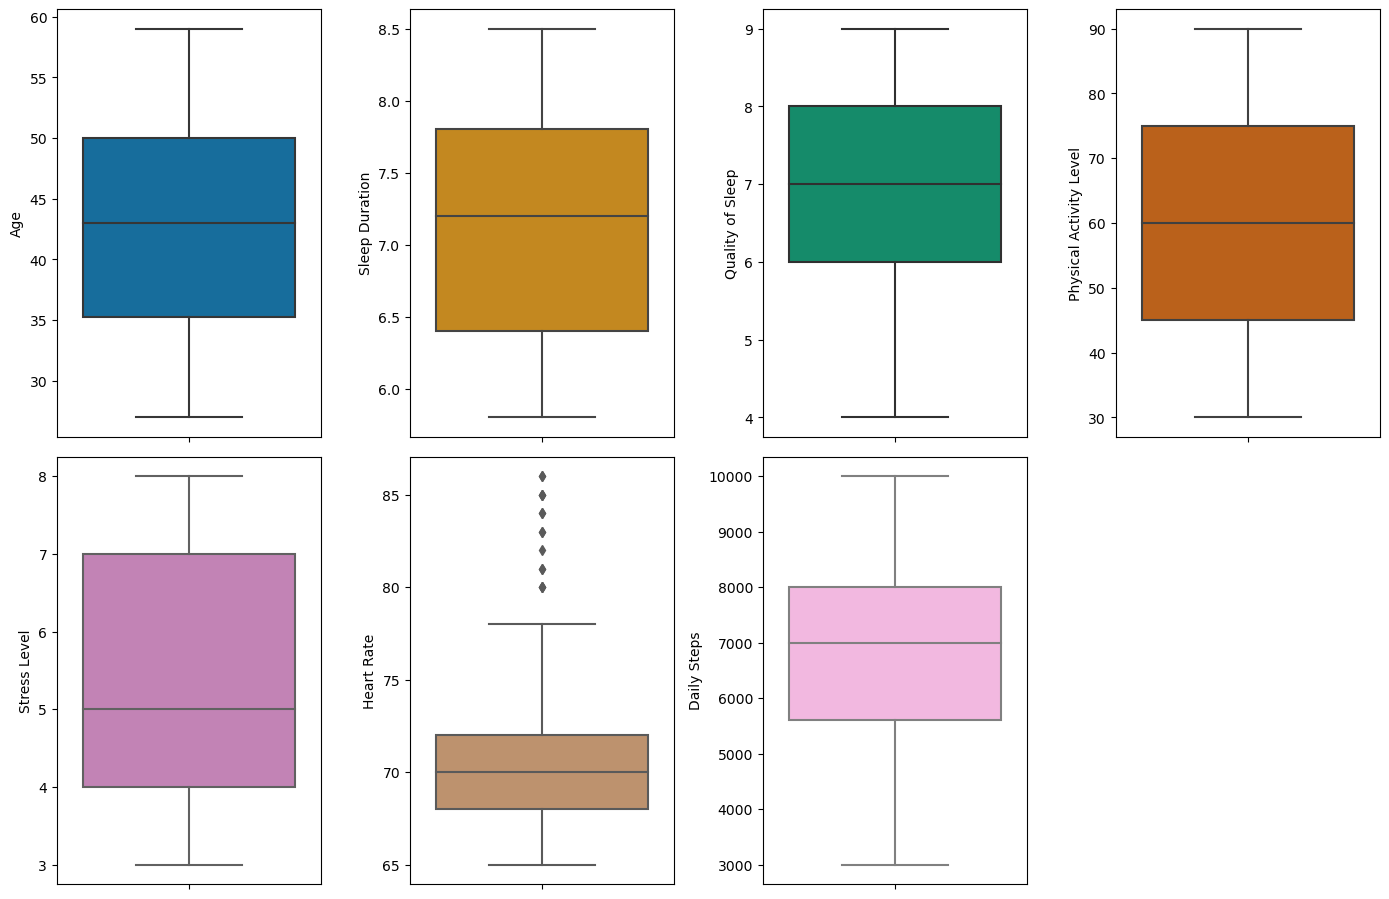

In [21]:
palette = sns.color_palette("colorblind")
variables = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

plt.figure(figsize=(14, 18))

for i, variable in enumerate(variables, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=sleep_data_numerical[variable], color=palette[i-1])

plt.tight_layout()
plt.show()

As we can see there are outliers in Heart rate 

In [22]:
def create_plots(*columns):
    for column in columns:
        fig, axs = plt.subplots(1, 3, figsize=(18, 8))

        # Scatter Plot
        axs[0].scatter(range(len(data_frame)), data_frame[column], color='skyblue', edgecolor='black')
        axs[0].set_title(f'Scatter Plot of {column}')
        axs[0].set_ylabel(f'{column} (hours)')
        axs[0].grid(True)

        # Box Plot
        sns.boxplot(x=data_frame[column], ax=axs[1], color='skyblue')
        axs[1].set_title(f'Box Plot of {column}')
        axs[1].set_xlabel(f'{column} (hours)')
        axs[1].grid(True)

        # Q-Q Plot
        stats.probplot(data_frame[column], dist="norm", plot=axs[2])
        axs[2].get_lines()[0].set_color('skyblue')
        axs[2].get_lines()[1].set_color('red')
        axs[2].set_title(f'Normal Q-Q Plot of {column}')
        axs[2].set_xlabel('Theoretical Quantiles')
        axs[2].set_ylabel('Sample Quantiles')
        axs[2].grid(True)

        plt.tight_layout()
        plt.show()

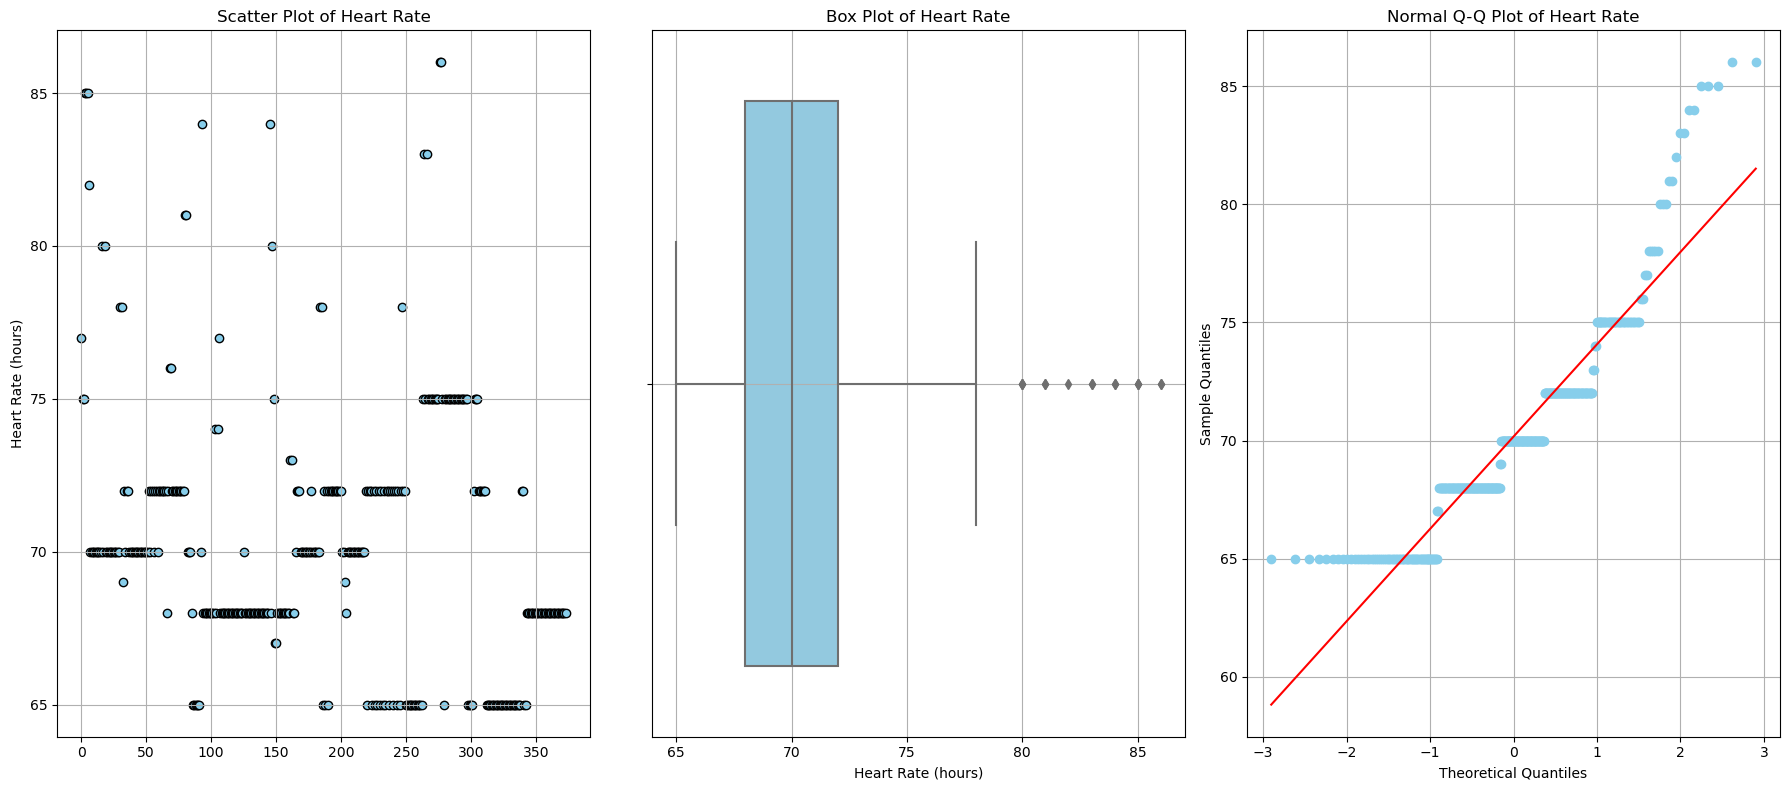

In [23]:
create_plots('Heart Rate')

In the above plots, it is evident that a few data points are away from the normal data. So, to handle it Inter Quartile Range is being implemented.

In [24]:
Q1_hr = data_frame['Heart Rate'].quantile(0.25)
Q3_hr = data_frame['Heart Rate'].quantile(0.75)
IQR_hr = Q3_hr - Q1_hr

lower_bound_hr = Q1_hr - 1.5 * IQR_hr
upper_bound_hr = Q3_hr + 1.5 * IQR_hr
print(lower_bound_hr)
print(upper_bound_hr)


data_frame['Heart Rate'] = data_frame['Heart Rate'].apply(
    lambda x: Q3_hr if x > upper_bound_hr else x
)

62.0
78.0


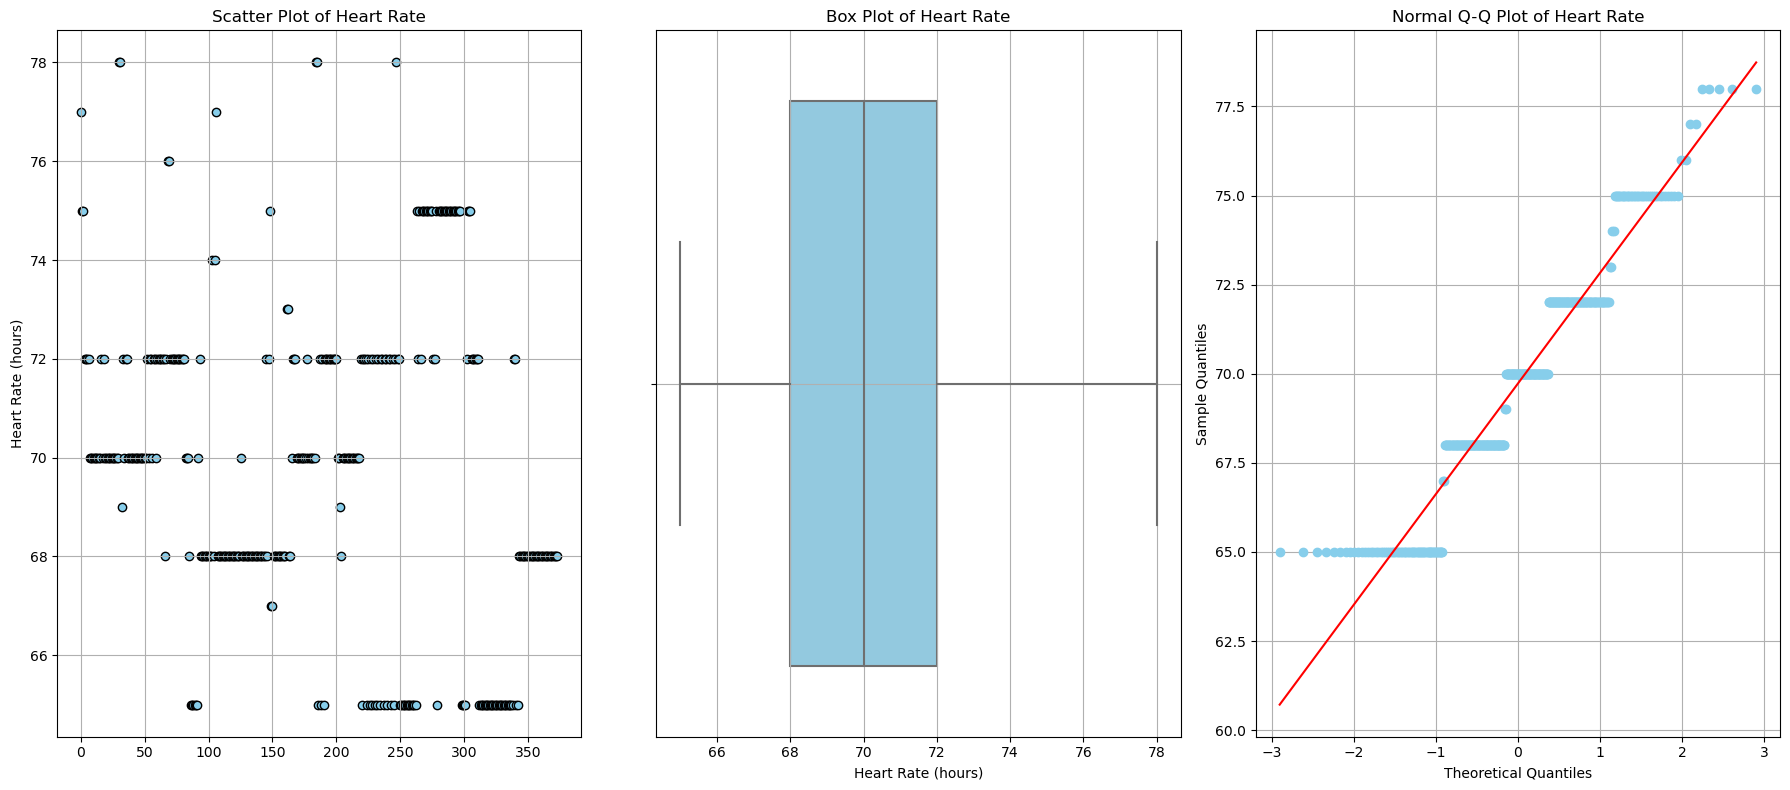

In [25]:
create_plots('Heart Rate')

In [26]:
data_frame

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200,No disorder,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,No disorder,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,No disorder,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,72.0,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,72.0,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68.0,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68.0,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68.0,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68.0,7000,Sleep Apnea,140,95


In [27]:
for column in data_frame.columns:
    if column != 'Person ID ':
        unique_values = data_frame[column].unique()
        print(f"Unique values in '{column}': {unique_values}")


Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Age': [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Unique values in 'Occupation': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in 'Sleep Duration': [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Unique values in 'Quality of Sleep': [6 4 7 5 8 9]
Unique values in 'Physical Activity Level': [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Unique values in 'Stress Level': [6 8 7 4 3 5]
Unique values in 'BMI Category': ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique values in 'Heart Rate': [77. 75. 72. 70. 78. 69. 68. 76. 65. 74. 67. 73.]
Unique values in 'Daily Steps': [ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  5500  5200
  5600  3300  4800  7500  7300  6200  6000  3700]
Unique 

### Classification of 'Quality of Sleep' and Influencing Factors

Given the unique values in 'Quality of Sleep' and its subjective rating on a scale from 1 to 10, the classification approach was adopted to categorize the quality of sleep into distinct classes for analysis.

Quality of sleep Classification Criteria Low & Medium Quality: Scores from 1 to 6 High Quality: Scores above 6

Models applied -
Decision Tree Classifier

Random Forest Classifier

In [28]:
def categorize_quality_of_sleep(quality):
    if quality <= 6:
        return 'Low to Medium Quality'
    else:
        return 'High Quality'

quality_of_sleep_df = data_frame.copy()
quality_of_sleep_df['Sleep Quality Category'] = quality_of_sleep_df['Quality of Sleep'].apply(categorize_quality_of_sleep)
quality_of_sleep_df = quality_of_sleep_df.drop(columns=['Quality of Sleep'])

unique_categories = quality_of_sleep_df['Sleep Quality Category'].unique()
category_counts = quality_of_sleep_df['Sleep Quality Category'].value_counts()

category_counts

High Quality             257
Low to Medium Quality    117
Name: Sleep Quality Category, dtype: int64

In [29]:
quality_of_sleep_df

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,Sleep Quality Category
0,Male,27,Software Engineer,6.1,42,6,Overweight,77.0,4200,No disorder,126,83,Low to Medium Quality
1,Male,28,Doctor,6.2,60,8,Normal,75.0,10000,No disorder,125,80,Low to Medium Quality
2,Male,28,Doctor,6.2,60,8,Normal,75.0,10000,No disorder,125,80,Low to Medium Quality
3,Male,28,Sales Representative,5.9,30,8,Obese,72.0,3000,Sleep Apnea,140,90,Low to Medium Quality
4,Male,28,Sales Representative,5.9,30,8,Obese,72.0,3000,Sleep Apnea,140,90,Low to Medium Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,75,3,Overweight,68.0,7000,Sleep Apnea,140,95,High Quality
370,Female,59,Nurse,8.0,75,3,Overweight,68.0,7000,Sleep Apnea,140,95,High Quality
371,Female,59,Nurse,8.1,75,3,Overweight,68.0,7000,Sleep Apnea,140,95,High Quality
372,Female,59,Nurse,8.1,75,3,Overweight,68.0,7000,Sleep Apnea,140,95,High Quality


### Label Encoding categorical varaibles

In [30]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
columns_to_encode = ['Occupation', 'Gender', 'BMI Category', 'Sleep Disorder', 'Sleep Quality Category']

for column in columns_to_encode:
    quality_of_sleep_df[column] = label_encoder.fit_transform(quality_of_sleep_df[column])

quality_of_sleep_df

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,Sleep Quality Category
0,1,27,9,6.1,42,6,3,77.0,4200,1,126,83,1
1,1,28,1,6.2,60,8,0,75.0,10000,1,125,80,1
2,1,28,1,6.2,60,8,0,75.0,10000,1,125,80,1
3,1,28,6,5.9,30,8,2,72.0,3000,2,140,90,1
4,1,28,6,5.9,30,8,2,72.0,3000,2,140,90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,75,3,3,68.0,7000,2,140,95,0
370,0,59,5,8.0,75,3,3,68.0,7000,2,140,95,0
371,0,59,5,8.1,75,3,3,68.0,7000,2,140,95,0
372,0,59,5,8.1,75,3,3,68.0,7000,2,140,95,0


### Model Building 1 (Quality of sleep Classification)

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

In [32]:
# Define the target variable
Target_variable = 'Sleep Quality Category'

In [33]:
# Define X (features) and y (target)
X = quality_of_sleep_df.drop(columns=[Target_variable])
y = quality_of_sleep_df[Target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### DecisionTreeClassifier

In [34]:
# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    max_features=None,  
    random_state=123
)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt.predict(X_test)

# Evaluate performance metrics
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree gives', accuracy_dt, 'accuracy on y_test')

# Perform cross-validation
cv_scores = cross_val_score(dt, X, y, cv=5)  # cv=5 for 5-fold cross-validation

# Print cross-validation scores
print("\nCross-validation scores:")
print(cv_scores)

# Print mean accuracy
print("Mean accuracy:", np.mean(cv_scores))


Decision Tree Confusion Matrix:
[[46  0]
 [ 0 29]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        29

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Decision Tree gives 1.0 accuracy on y_test

Cross-validation scores:
[1.         0.97333333 0.97333333 0.90666667 0.95945946]
Mean accuracy: 0.9625585585585587


### Random forest

In [35]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'criterion': ['gini', 'entropy']
}

rf_Q = RandomForestClassifier(random_state=123)
grid_search = GridSearchCV(estimator=rf_Q, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best parameters found: {grid_search.best_params_}')

rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)
y_pred_rf_best = rf_best.predict(X_test)

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_best))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_best))

accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print('Random Forest gives', accuracy_rf_best, 'accuracy on y_test')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}

Random Forest Confusion Matrix:
[[46  0]
 [ 0 29]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        29

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Random Forest gives 1.0 accuracy on y_test


In [36]:

results_df = pd.DataFrame({
    'Actual': y_test,
    'Prediction': y_pred_rf_best
}, index=y_test.index)

print(results_df.head(10))


     Actual  Prediction
329       0           0
33        1           1
15        1           1
325       0           0
57        1           1
239       1           1
76        1           1
119       0           0
332       0           0
126       0           0


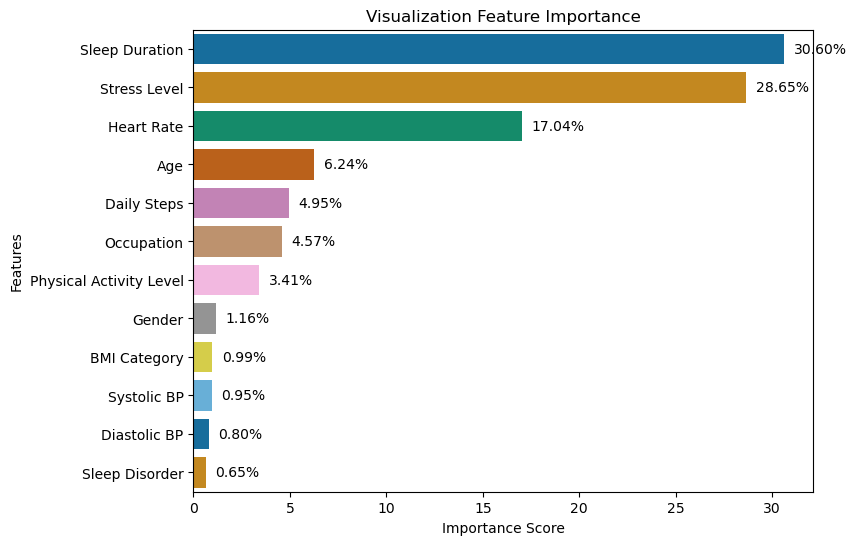

In [37]:
# Feature Importance
total_importance = rf_best.feature_importances_.sum()
feature_score = pd.Series(rf_best.feature_importances_ / total_importance * 100, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_score, y=feature_score.index, palette='colorblind')

for i, v in enumerate(feature_score):
    plt.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.title('Visualization Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

The results of this investigation showed that the two most important factors influencing the quality of sleep are stress level (28.65%) and sleep duration (30.60%). Furthermore, there is a large contribution from Heart Rate (17.04%), Age (6.24%), Daily Steps (4.95%), and Occupation (4.57%). This emphasizes how crucial it is to manage stress, get enough sleep, and maintain good physical health in order to get improved sleep quality.

### Model Building 2( Sleep Disorder  and influencing factors)

##### Classification of 'Sleep Disorder' and Influencing Factors
In assessing the presence or absence of sleep disorders in individuals, three distinct categories were considered: No disorder, Insomnia, and Sleep Apnea. To facilitate analysis, a classification approach label encoding was applied.

Models applied -

Decision Tree

Random Forest Classifier

In [38]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    float64
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  Systolic BP              374 non-null    int64  
 12  Diastolic BP             374 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 38.1+ KB


In [39]:
sleep_disorder_df = data_frame.copy()
sleep_disorder_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200,No disorder,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,No disorder,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,No disorder,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,72.0,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,72.0,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68.0,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68.0,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68.0,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68.0,7000,Sleep Apnea,140,95


#### Label Encoding 


In [40]:
label_encoder = preprocessing.LabelEncoder()
columns_to_encode = ['Occupation', 'Gender', 'BMI Category', 'Sleep Disorder']

encoding_mappings = {}

for column in columns_to_encode:
    sleep_disorder_df[column] = label_encoder.fit_transform(sleep_disorder_df[column])
    encoding_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Encoding mapping for 'Sleep Disorder':", encoding_mappings['Sleep Disorder'])

sleep_disorder_df

Encoding mapping for 'Sleep Disorder': {'Insomnia': 0, 'No disorder': 1, 'Sleep Apnea': 2}


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,6,3,77.0,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75.0,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75.0,10000,1,125,80
3,1,28,6,5.9,4,30,8,2,72.0,3000,2,140,90
4,1,28,6,5.9,4,30,8,2,72.0,3000,2,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,68.0,7000,2,140,95
370,0,59,5,8.0,9,75,3,3,68.0,7000,2,140,95
371,0,59,5,8.1,9,75,3,3,68.0,7000,2,140,95
372,0,59,5,8.1,9,75,3,3,68.0,7000,2,140,95


In [41]:
sleep_disorder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int32  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int32  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int32  
 8   Heart Rate               374 non-null    float64
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int32  
 11  Systolic BP              374 non-null    int64  
 12  Diastolic BP             374 non-null    int64  
dtypes: float64(2), int32(4), int64(7)
memory usage: 32.3 KB


In [42]:

Target_variable_s = 'Sleep Disorder'

X_s = sleep_disorder_df.drop(columns=[Target_variable_s])
y_s = sleep_disorder_df[Target_variable_s]

y_s

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int32

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2, random_state=42)
X_train

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
192,1,43,7,6.5,6,45,7,3,72.0,6000,130,85
75,1,33,1,6.0,6,30,8,0,72.0,5000,125,80
84,1,35,9,7.5,8,60,5,1,70.0,8000,120,80
362,0,59,5,8.2,9,75,3,3,68.0,7000,140,95
16,0,29,5,6.5,5,40,7,1,72.0,4000,132,87
...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,33,1,6.1,6,30,8,0,72.0,5000,125,80
106,0,37,5,6.1,6,42,6,3,77.0,4200,126,83
270,0,49,5,6.1,6,90,8,3,75.0,10000,140,95
348,0,57,5,8.2,9,75,3,3,68.0,7000,140,95


#### DecisionTreeClassifier

In [44]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2', None]
}

dt = DecisionTreeClassifier(random_state=123)


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


print(f'Best parameters found: {grid_search.best_params_}')


dt_best = grid_search.best_estimator_



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt'}


In [45]:
# Perform cross-validation with the best estimator on the entire dataset
cv_scores = cross_val_score(dt_best, X, y, cv=5, n_jobs=-1, verbose=2)

# Print cross-validation scores
print("\nCross-validation scores:")
print(cv_scores)

# Print mean accuracy
print("Mean accuracy:", np.mean(cv_scores))

# Fit the model on the training data
dt_best.fit(X_train, y_train)

# Predict on the test data
y_pred_dt_best = dt_best.predict(X_test)

# Evaluate performance metrics
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_best))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt_best))

# Print the accuracy
accuracy_dt_best = accuracy_score(y_test, y_pred_dt_best)
print('Decision Tree gives', accuracy_dt_best, 'accuracy on y_test')



Cross-validation scores:
[1.         0.96       0.97333333 0.89333333 1.        ]
Mean accuracy: 0.9653333333333334

Decision Tree Confusion Matrix:
[[13  1  2]
 [ 1 42  0]
 [ 4  1 11]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

Decision Tree gives 0.88 accuracy on y_test


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


#### Random Forest Classifier

In [46]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'criterion': ['gini', 'entropy']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=123)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print(f'Best parameters found: {grid_search.best_params_}')

# Use the best estimator found by grid search
rf_best = grid_search.best_estimator_

# Perform cross-validation with the best estimator on the entire dataset
cv_scores = cross_val_score(rf_best, X, y, cv=5, n_jobs=-1, verbose=2)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [47]:
# Print cross-validation scores
print("\nCross-validation scores:")
print(cv_scores)

# Print mean accuracy
print("Mean accuracy:", np.mean(cv_scores))

# Fit the model on the training data
rf_best.fit(X_train, y_train)

# Predict on the test data
y_pred_rf_best = rf_best.predict(X_test)

# Evaluate performance metrics
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_best))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_best))

# Print the accuracy
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print('Random Forest gives', accuracy_rf_best, 'accuracy on y_test')


Cross-validation scores:
[1.         1.         0.96       0.90666667 1.        ]
Mean accuracy: 0.9733333333333334

Random Forest Confusion Matrix:
[[13  1  2]
 [ 1 42  0]
 [ 4  1 11]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

Random Forest gives 0.88 accuracy on y_test


In [48]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Prediction': y_pred_rf_best
}, index=y_test.index)

print(results_df.head(20))

     Actual  Prediction
329       1           1
33        1           1
15        1           1
325       1           1
57        1           1
239       0           0
76        1           1
119       1           1
332       1           1
126       1           1
233       0           0
39        1           1
153       1           1
55        1           1
155       1           1
278       0           2
0         1           1
231       0           0
336       1           1
101       1           1


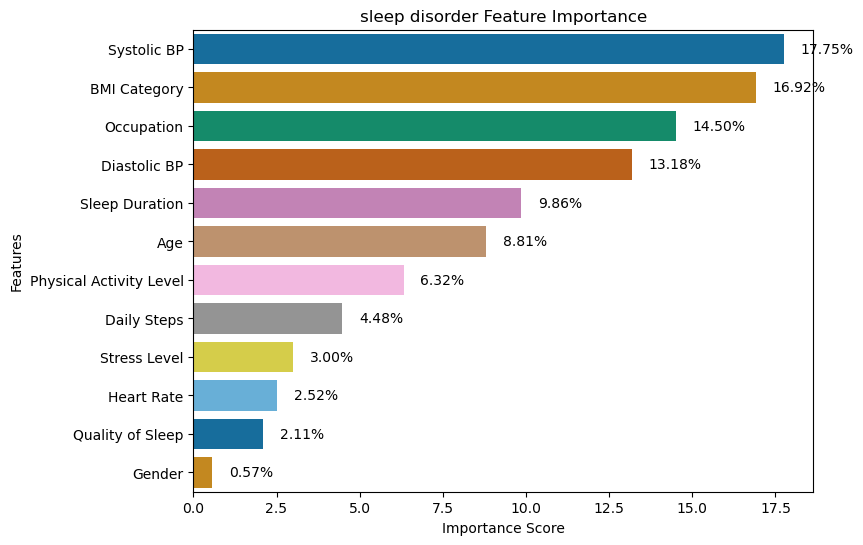

In [49]:
total_importance = rf_best.feature_importances_.sum()
feature_score = pd.Series(rf_best.feature_importances_ / total_importance * 100, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_score, y=feature_score.index, palette='colorblind')

for i, v in enumerate(feature_score):
    plt.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.title('sleep disorder Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

The most important variables influencing sleep problems were found to be Systolic Blood Pressure (17.75%), BMI Category (16.92%), and Diastolic Blood Pressure (14.50%) in this analysis. These results highlight the important part that cardiovascular health markers play in problems connected to sleep. In addition, the likelihood of sleep disorders is also highly influenced by age (8.81%), occupation (14.50%), and sleep duration (9.86%). This emphasizes how crucial it is to manage sleep disorders by taking age-related changes into account, making sure you get enough sleep, and taking occupational considerations into account.